# Imports Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset properly
housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()

# Rename target column for clarity
df.rename(columns={'MedHouseVal': 'median_house_value'}, inplace=True)

# Features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


## Exploratory Data Analysis (EDA)

In [2]:
# 1. Basic info
print(df.head())
print(df.info())
print(df.describe())

# 2. Missing values
print("Missing values:\n", df.isnull().sum())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            2064

# 3. Histograms


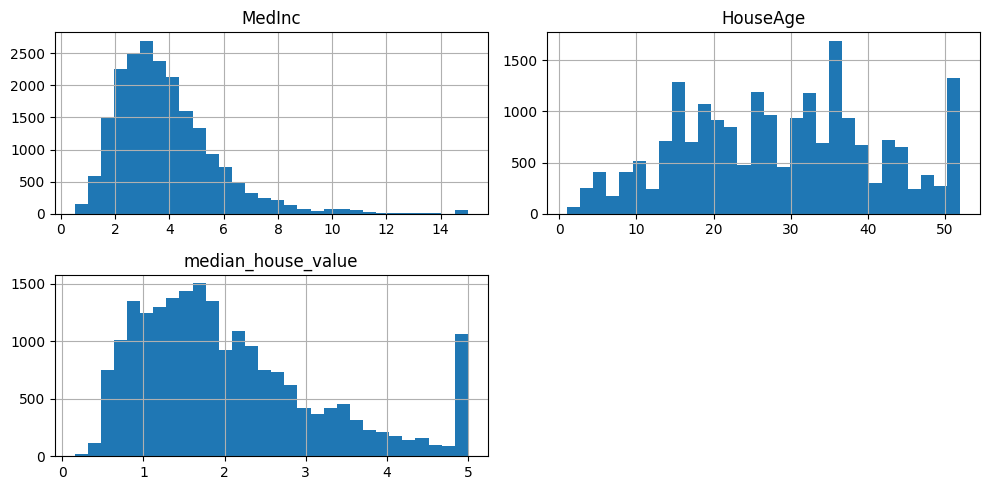

In [3]:
# 3. Histograms
df[['MedInc', 'HouseAge', 'median_house_value']].hist(bins=30, figsize=(10,5))
plt.tight_layout()
plt.show()


# 4. Box plot


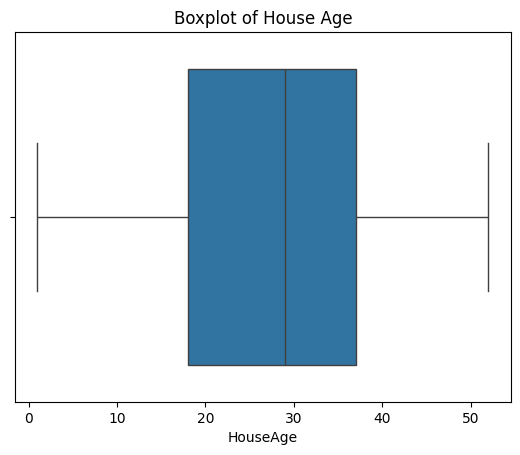

In [4]:
sns.boxplot(x=df['HouseAge'])
plt.title("Boxplot of House Age")
plt.show()



## 5. Scatter: Median Income vs House Value


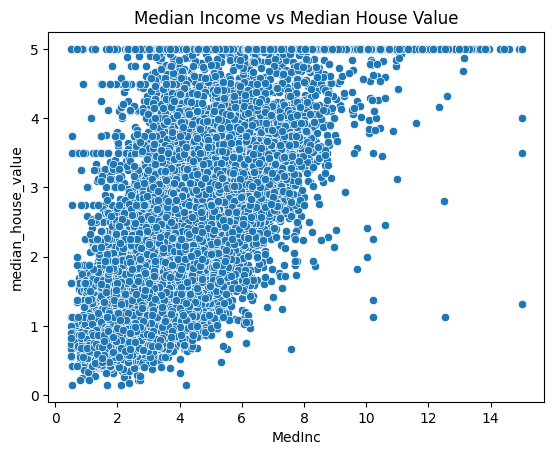

In [5]:
sns.scatterplot(x='MedInc', y='median_house_value', data=df)
plt.title("Median Income vs Median House Value")
plt.show()


# 6. Correlation


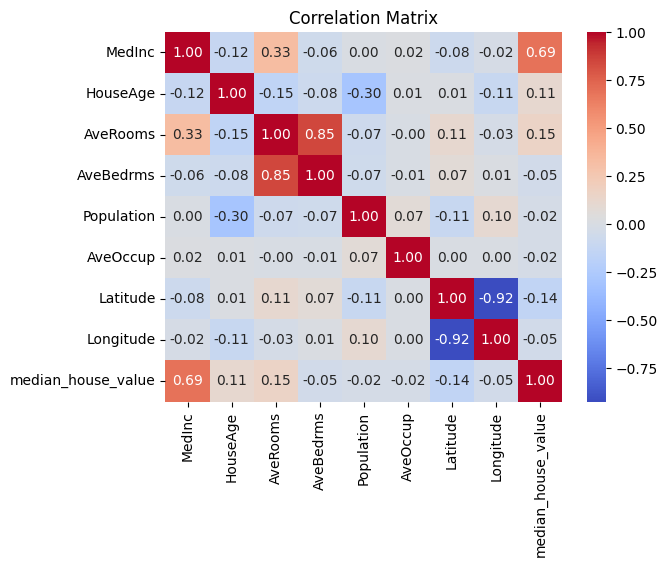

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Correlation with target variable


In [7]:
print("\nCorrelation with median_house_value:")
print(corr['median_house_value'].sort_values(ascending=False))



Correlation with median_house_value:
median_house_value    1.000000
MedInc                0.688075
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
Longitude            -0.045967
AveBedrms            -0.046701
Latitude             -0.144160
Name: median_house_value, dtype: float64


## 7. Geographic scatter

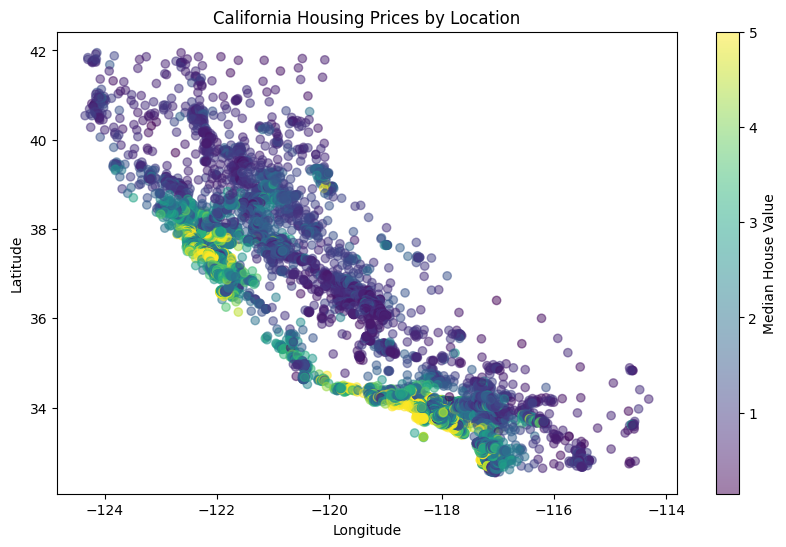

In [8]:
# 7. Geographic scatter
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices by Location")
plt.show()

## Data Preprocessing


In [9]:
# Feature engineering
df['RoomsPerBedroom'] = df['AveRooms'] / df['AveBedrms']
df['PeoplePerHousehold'] = df['Population'] / df['AveOccup']


# Features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42)



## Model Training and Evaluation

In [10]:

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"{name} -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_test, y_test)

Linear Regression -> MSE: 0.49, RMSE: 0.70, R²: 0.627
Decision Tree -> MSE: 0.49, RMSE: 0.70, R²: 0.624
Random Forest -> MSE: 0.26, RMSE: 0.51, R²: 0.805


## Model Interpretation

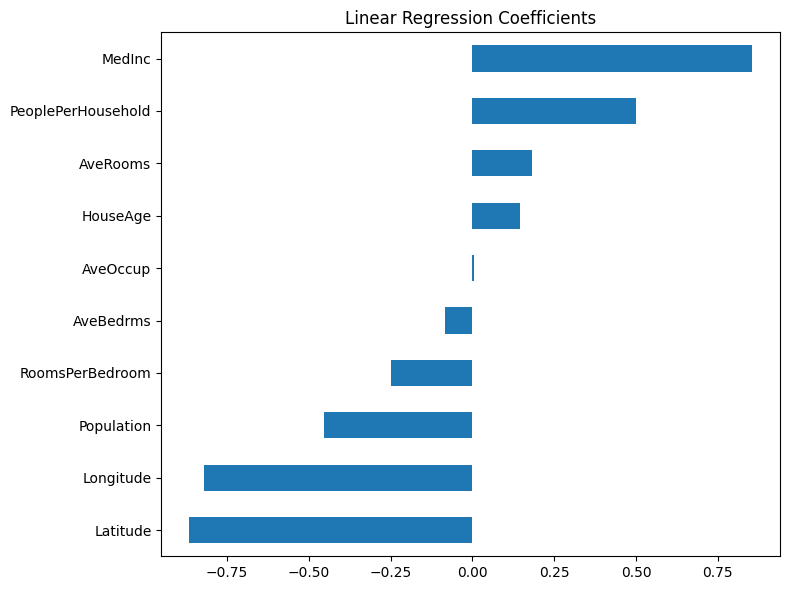

In [11]:
# Coefficients of linear regression
coeffs = pd.Series(lr.coef_, index=X.columns)
coeffs.sort_values().plot(kind='barh', figsize=(8,6), title="Linear Regression Coefficients")
plt.tight_layout()
plt.show()
